First 5 rows of the dataset:

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4

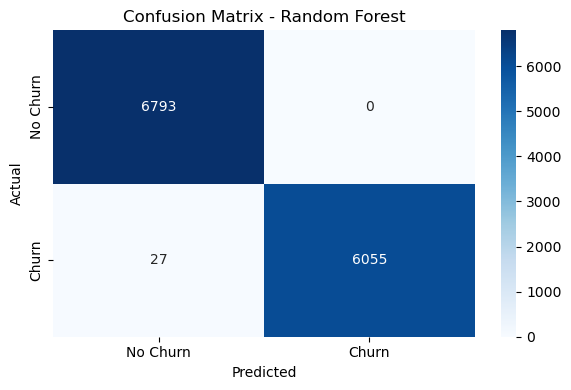

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset (update the path if needed)
df = pd.read_csv(r"C:\Users\VINODA B L\OneDrive\customer_churn_dataset-testing-master.csv\customer_churn_dataset-testing-master.csv")

# Display the first 5 rows
print("First 5 rows of the dataset:\n")
print(df.head())

# Display dataset info
print("\nDataset Information:\n")
print(df.info())

# Check for missing values
print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())

# Display Churn class distribution
print("\nChurn Class Distribution:\n")
print(df['Churn'].value_counts())

# Drop 'customerID' column if exists
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Replace blank strings with NaN and drop missing rows
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split dataset into features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100  # convert to percentage

print("\nConfusion Matrix:\n", conf_matrix)
print(f"\nAccuracy: {accuracy:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
